In [1]:
import cv2
import numpy as np 
import time
import os

In [2]:
import numpy.core.multiarray
image = cv2.imread("trial.jpg")
image
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv

array([[[ 13, 179, 104],
        [ 13, 186, 100],
        [ 13, 197,  97],
        ...,
        [110,  18, 255],
        [110,  18, 255],
        [110,  18, 255]],

       [[ 13, 174, 110],
        [ 13, 180, 106],
        [ 13, 188, 102],
        ...,
        [110,  18, 255],
        [110,  18, 255],
        [110,  18, 255]],

       [[ 13, 174, 116],
        [ 12, 174, 113],
        [ 12, 182, 108],
        ...,
        [110,  18, 255],
        [110,  18, 255],
        [110,  18, 255]],

       ...,

       [[ 43, 228, 122],
        [ 43, 217, 128],
        [ 42, 204, 134],
        ...,
        [ 24,  81, 194],
        [ 23,  80, 194],
        [ 23,  78, 194]],

       [[ 43, 217, 135],
        [ 43, 208, 141],
        [ 43, 193, 148],
        ...,
        [ 24,  82, 193],
        [ 23,  80, 194],
        [ 23,  78, 193]],

       [[ 43, 215, 140],
        [ 43, 202, 145],
        [ 43, 190, 154],
        ...,
        [ 24,  82, 193],
        [ 23,  78, 194],
        [ 22,  77, 193]]

In [3]:
upper = np.array([0,0,100])
lower = np.array([10,255,255])

In [4]:
mask1 = cv2.inRange(hsv, upper, lower)
cv2.imwrite("mask1.jpg",mask1)

True

In [5]:
cv2.imshow('Image', image)
cv2.imshow('Result', mask1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
from matplotlib import pyplot as plt
img = cv2.imread('mask1.jpg', cv2.IMREAD_GRAYSCALE)
#assert img is not None, "file could not be read, check with os.path.exists()"
img = cv2.medianBlur(img,13) # second aargument of this func must be odd
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

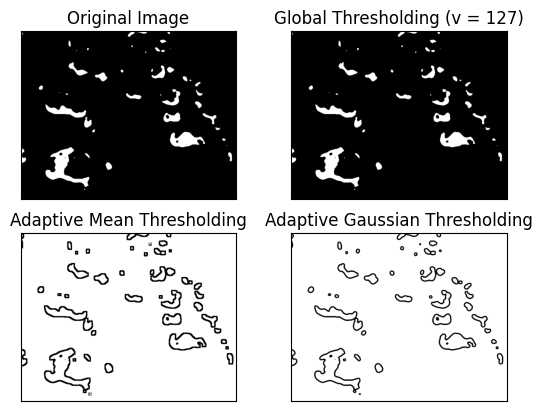

In [8]:
import cv2 as cv
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [9]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=th2, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)                                 
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow('None approximation', image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()
